In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import lil_matrix, linalg as splinalg


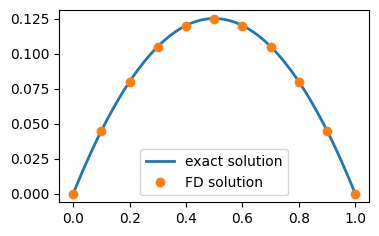

In [2]:


# Function to create a 1D Laplacian matrix using centered finite differences
def L1d(N):
    diagonals = [-N**2 * np.ones(N-2), 2*N**2 * np.ones(N-1), -N**2 * np.ones(N-2)]
    return diags(diagonals, [-1, 0, 1], shape=(N-1, N-1)).toarray()

# Poisson's Equation on the Unit Interval
N = 10
f = lambda x: 1.0

# Creating the grid
X = np.linspace(0, 1, N+1)

# Grid functions F and U
F = np.array([f(x) for x in X[1:-1]])
U = np.zeros(N+1)

# Solving the finite-difference equation
U[1:N] = np.linalg.solve(L1d(N), F)

# Plotting the result
xp = np.linspace(0, 1, 100)
plt.figure(figsize=(4, 2.5))
plt.plot(xp, 0.5 * xp * (1 - xp), lw=2, label="exact solution")
plt.plot(X, U, 'o', label="FD solution")
plt.legend()
plt.show()


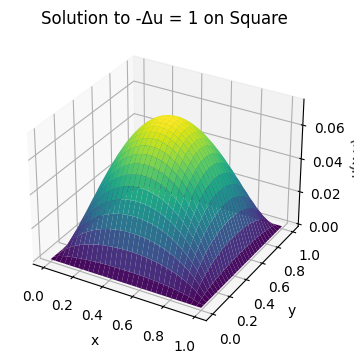

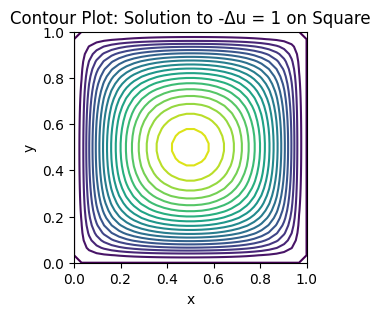

In [3]:


# Function to create the square domain
def square(N):
    # Defining the full square domain
    Ω = np.ones((N+2, N+2), dtype=bool)
    Ω[0, :] = Ω[-1, :] = Ω[:, 0] = Ω[:, -1] = False  # Setting boundary to false
    return Ω

# Function to define the Laplacian matrix
def fdlaplacian(Ω):
    N = Ω.shape[0] - 2
    Δ = lil_matrix(((N+2)**2, (N+2)**2))
    for j in range(1, N+1):
        for i in range(1, N+1):
            if Ω[i, j]:
                k = i + j * (N+2)
                Δ[k, k] = 4 * N**2
                if Ω[i-1, j]: Δ[k, k-(N+2)] = -N**2
                if Ω[i+1, j]: Δ[k, k+(N+2)] = -N**2
                if Ω[i, j-1]: Δ[k, k-1] = -N**2
                if Ω[i, j+1]: Δ[k, k+1] = -N**2
    nonz = np.array(Ω).flatten().nonzero()[0]
    return Δ.tocsr()[nonz, :][:, nonz], nonz

# Solving Poisson's Equation on the Unit Square
N = 30
L, nonz = fdlaplacian(square(N))
U = splinalg.spsolve(L, np.ones(L.shape[0]))

# Post-process by writing the interior nodes into a larger grid function
U0_square = np.zeros((N+2, N+2))
U0_square.flat[nonz] = U

# Create the grid for plotting
x = y = np.linspace(0, 1, N+2)

# Surface plot of the solution on square domain
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U0_square, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title("Solution to -Δu = 1 on Square")
plt.show()

# Contour plot of the solution on square domain
plt.figure(figsize=(3, 3))
plt.contour(X, Y, U0_square, levels=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Contour Plot: Solution to -Δu = 1 on Square")
plt.grid(False)
plt.xticks(np.linspace(0, 1, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.show()


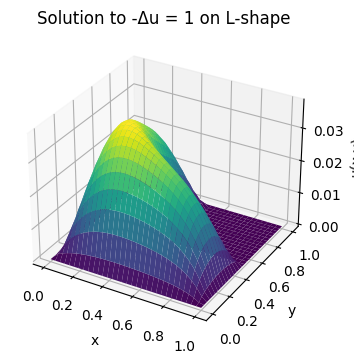

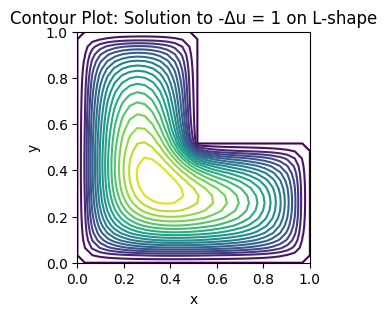

In [4]:


# Function to create the L-shaped domain
def lshape(N):
    Ω = np.zeros((N+2, N+2), dtype=bool)
    Ω[1:-1, 1:-1] = True
    Ω[N//2+1:, N//2+1:] = False
    return Ω

# Function to define the Laplacian matrix
def fdlaplacian(Ω):
    N = Ω.shape[0] - 2
    Δ = lil_matrix(((N+2)**2, (N+2)**2))
    for j in range(1, N+1):
        for i in range(1, N+1):
            if Ω[i, j]:
                k = i + j * (N+2)
                Δ[k, k] = 4 * N**2
                if Ω[i-1, j]: Δ[k, k-(N+2)] = -N**2
                if Ω[i+1, j]: Δ[k, k+(N+2)] = -N**2
                if Ω[i, j-1]: Δ[k, k-1] = -N**2
                if Ω[i, j+1]: Δ[k, k+1] = -N**2
    nonz = np.array(Ω).flatten().nonzero()[0]
    return Δ.tocsr()[nonz, :][:, nonz], nonz

# Solving the finite difference problem on the L-shaped domain
N = 30
L, nonz = fdlaplacian(lshape(N))
U = splinalg.spsolve(L, np.ones(L.shape[0]))

# Post-process by writing the interior nodes into a larger grid function
U0 = np.zeros((N+2, N+2))
U0.flat[nonz] = U

# Create the grid for plotting
x = y = np.linspace(0, 1, N+2)

# Surface plot of the solution on L-shaped domain
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U0, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title("Solution to -Δu = 1 on L-shape")
plt.show()

# Contour plot of the solution on L-shaped domain
plt.figure(figsize=(3, 3))
plt.contour(X, Y, U0, levels=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Contour Plot: Solution to -Δu = 1 on L-shape")
plt.grid(False)
plt.xticks(np.linspace(0, 1, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.show()
